### Importación librerias requeridas
### Obtener conexión y generar consulta ppal

In [6]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import tkinter as tk
from tkcalendar import Calendar

load_dotenv()

%run conexionDB.ipynb

# Obtener la conexión
engine = obtener_conexion()

#### Calcular fechas dinámicamente permitiendo al usuario seleccionarlas a través de un Calendario

In [15]:
# Variable global para almacenar el dataframe
df = None

# Función para obtener la fecha seleccionada
def obtener_fechas():
    global df  # Usar la variable global

    # Obtiene las fechas seleccionadas
    fecha_inicio = calendar_inicio.get_date()
    fecha_fin = calendar_fin.get_date()
    
    # Convertir las fechas a formato adecuado
    fecha_inicio = str(fecha_inicio)
    fecha_fin = str(fecha_fin)
    
    # Crear la consulta SQL con las fechas seleccionadas
    query = f"""
    SELECT os.number AS No, 
           osd.priority,         
           tp.priority as npriority,
           ht.topic,
           sla.grace_period,
           sla.name,       
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    WHERE os.topic_id BETWEEN 1 AND 26    
    AND DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '{fecha_inicio}' AND '{fecha_fin}'
    ORDER BY os.created
    """    
    
    # Imprimir la consulta para verificar
    print(query)
    
    # Ejecutar la consulta y almacenar los resultados en la variable global
    df = pd.read_sql(query, engine)
    
    # Cerrar la ventana
    ventana.destroy()
    #Aca finaliza la función obtener_fechas()

# Crear la ventana principal
ventana = tk.Tk()
ventana.title("Seleccionar Fechas")

# Etiquetas
tk.Label(ventana, text="Fecha Inicial").grid(row=0, column=0, padx=10, pady=10)
tk.Label(ventana, text="Fecha Final").grid(row=1, column=0, padx=10, pady=10)

# Crear calendario para la fecha de inicio
calendar_inicio = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_inicio.grid(row=0, column=1, padx=10, pady=10)

# Crear calendario para la fecha de fin
calendar_fin = Calendar(ventana, date_pattern='yyyy-mm-dd', locale="es_ES",
                          background = "blue",
                          foreground = "white",
                          selectbackground = "red",
                          normalbackground = "lightblue",
                          weekendbackground = "darkblue",
                          weekendforeground = "white")                          
calendar_fin.grid(row=1, column=1, padx=10, pady=10)

# Botón para obtener las fechas y ejecutar la consulta llamando la función previamente creada obtener_fechas()
boton = tk.Button(ventana, text="Obtener resultados", command=obtener_fechas)
boton.grid(row=2, column=0, columnspan=2, pady=20)

# Iniciar la interfaz
ventana.mainloop()

# Imprimir el dataframe global después de que la ventana se cierre
if df is not None:
    print(df)


    SELECT os.number AS No, 
           osd.priority,         
           tp.priority as npriority,
           ht.topic,
           sla.grace_period,
           sla.name,       
           osd.subject as Titulo, 
           DATE_ADD(os.created, INTERVAL -6 HOUR) as Creado,
           DATE_ADD(os.closed, INTERVAL -6 HOUR) as Cerrado, 
           DATE_ADD(os.reopened, INTERVAL -6 HOUR) as Reabierto
    FROM ost_ticket AS os
    LEFT JOIN ost_ticket__cdata AS osd ON os.ticket_id = osd.ticket_id
    LEFT JOIN ost_sla AS sla ON os.sla_id = sla.id
    LEFT JOIN ost_help_topic AS ht ON os.topic_id = ht.topic_id
    LEFT JOIN ost_ticket_priority AS tp ON osd.priority = tp.priority_id
    WHERE os.topic_id BETWEEN 1 AND 26    
    AND DATE_ADD(os.created, INTERVAL -6 HOUR) BETWEEN '2024-11-06' AND '2024-12-27'
    ORDER BY os.created
    
         No priority npriority  topic  grace_period         name  \
0    039876        2    normal    SII           2.0  TI - Normal   
1    039881        2 

### Revisar la estructura del DataFrame

In [ ]:
df.info()

### Identificar valores nulos

In [ ]:
#df.isnull().values.any()
df.isnull().sum()

### Revisar los tipos de datos
#### Que exista concordancia con el dato almacenado.

In [ ]:
df.dtypes

### Información estadística

In [ ]:
df.describe()

In [16]:
# Obtener el tiempo transcurrido entre la fecha de creación y el cierre del ticket.
df["Diferencia_Cerrado"] = df["Cerrado"] - df["Creado"]
df

,No,priority,npriority,topic,grace_period,name,Titulo,Creado,Cerrado,Reabierto,Diferencia_Cerrado
0,039876,2,normal,SII,2.0,TI - Normal,Activar usuario,2024-11-06 07:37:15,2024-11-06 07:46:27,NaT,0 days 00:09:12
1,039881,2,normal,SII,2.0,TI - Normal,IMPUESTO,2024-11-06 08:46:20,2024-11-06 09:21:02,NaT,0 days 00:34:42
2,039883,2,normal,Otros,NaN,None,SOLICITUD ORGANIZACION PUESTOS DEL ARCHIVO,2024-11-06 09:18:51,2024-11-06 12:41:25,NaT,0 days 03:22:34
3,039884,2,normal,SII,2.0,TI - Normal,Desactivar usuario,2024-11-06 09:45:24,2024-11-06 10:00:59,NaT,0 days 00:15:35
4,039885,2,normal,SII,2.0,TI - Normal,usuario Logueado,2024-11-06 09:47:12,2024-11-06 10:56:10,NaT,0 days 01:08:58
...,...,...,...,...,...,...,...,...,...,...,...
627,040787,2,normal,SII,2.0,TI - Normal,reasignar a abogado,2024-12-26 15:50:23,2024-12-26 16:12:50,NaT,0 days 00:22:27
628,040788,2,normal,SII,2.0,TI - Normal,Parametrizar impuesto sin cuantia 0.7%,2024-12-26 15:58:39,2024-12-26 16:03:22,NaT,0 days 00:04:43
629,040791,2,normal,Otros,2.0,TI - Normal,Solicitud actualización de informacion,2024-12-26 16:34:36,2024-12-26 17:46:45,NaT,0 days 01:12:09
630,040793,2,normal,SII,2.0,TI - Normal,HABILITAR SERVICIOS IMP SIN CUANTIA,2024-12-26 16:45:41,2024-12-26 17:11:28,NaT,0 days 00:25:47


In [8]:
df.duplicated().sum()

np.int64(0)

In [17]:
# Verificar valores únicos de priority
df["priority"].unique()

array(['2', '3'], dtype=object)

In [10]:
# Eliminar posibles espacios en blanco de priority antes de convertirlo a int
df["priority"] = df["priority"].str.strip()

In [18]:
# Convertir priority (object) a priority(int) y así poderlo comparar (df["priority"] == 1)
df['priority'] = df['priority'].astype(int)

In [ ]:
df.info()

In [19]:
# Convertir Diferencia_Cerrado a horas
df["Horas_Cerrado"] = df["Diferencia_Cerrado"].dt.total_seconds() / 3600

# Crear la columna Indicador con numpy.select
condiciones = [
    (df["priority"] == 1) & (df["Horas_Cerrado"] <= 3),
    (df["priority"] == 2) & (df["Horas_Cerrado"] <= 2),
    (df["priority"] == 3) & (df["Horas_Cerrado"] <= 1),
]

valores = ["Cumple", "Cumple", "Cumple"]

df["Indicador"] = np.select(condiciones, valores, default="No cumple")
df

,No,priority,npriority,topic,grace_period,name,Titulo,Creado,Cerrado,Reabierto,Diferencia_Cerrado,Horas_Cerrado,Indicador
0,039876,2,normal,SII,2.0,TI - Normal,Activar usuario,2024-11-06 07:37:15,2024-11-06 07:46:27,NaT,0 days 00:09:12,0.153333,Cumple
1,039881,2,normal,SII,2.0,TI - Normal,IMPUESTO,2024-11-06 08:46:20,2024-11-06 09:21:02,NaT,0 days 00:34:42,0.578333,Cumple
2,039883,2,normal,Otros,NaN,None,SOLICITUD ORGANIZACION PUESTOS DEL ARCHIVO,2024-11-06 09:18:51,2024-11-06 12:41:25,NaT,0 days 03:22:34,3.376111,No cumple
3,039884,2,normal,SII,2.0,TI - Normal,Desactivar usuario,2024-11-06 09:45:24,2024-11-06 10:00:59,NaT,0 days 00:15:35,0.259722,Cumple
4,039885,2,normal,SII,2.0,TI - Normal,usuario Logueado,2024-11-06 09:47:12,2024-11-06 10:56:10,NaT,0 days 01:08:58,1.149444,Cumple
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,040787,2,normal,SII,2.0,TI - Normal,reasignar a abogado,2024-12-26 15:50:23,2024-12-26 16:12:50,NaT,0 days 00:22:27,0.374167,Cumple
628,040788,2,normal,SII,2.0,TI - Normal,Parametrizar impuesto sin cuantia 0.7%,2024-12-26 15:58:39,2024-12-26 16:03:22,NaT,0 days 00:04:43,0.078611,Cumple
629,040791,2,normal,Otros,2.0,TI - Normal,Solicitud actualización de informacion,2024-12-26 16:34:36,2024-12-26 17:46:45,NaT,0 days 01:12:09,1.202500,Cumple
630,040793,2,normal,SII,2.0,TI - Normal,HABILITAR SERVICIOS IMP SIN CUANTIA,2024-12-26 16:45:41,2024-12-26 17:11:28,NaT,0 days 00:25:47,0.429722,Cumple


In [ ]:
df[df["Indicador"] == "No cumple"]

In [ ]:
(df["Indicador"] == "Cumple").sum()

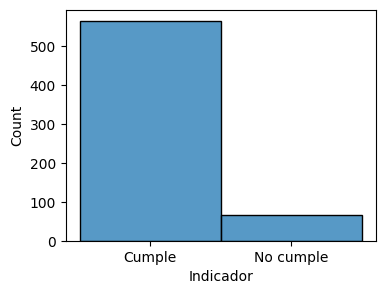

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (4,3))
sns.histplot(data = df, x = "Indicador", bins = 50)
plt.show()

In [21]:
# Contar el número de soportes que cumplen
soportes_cumplen = (df["Indicador"] == "Cumple").sum()

# Obtener el total de soportes recibidos
total_soportes = len(df)

indicador_final = (soportes_cumplen / total_soportes) * 100
print(f"Indicador mensual es: {indicador_final:.2f}%")

Indicador mensual es: 89.56%


In [ ]:
df.to_csv("tickets.csv", index = False)

In [ ]:
import sys
print(sys.executable)

In [ ]:
import pandas as pd

pd.read_csv("C:\\python\\tickets.csv")

#### Obtener Tickets Reabiertos, el usuario considera que no fue resuelto o se presentó de nuevo la situación original

In [4]:
queryReabiertos = f"""
SELECT *
FROM ost_ticket
WHERE reopened != 'NULL'
"""    
# Imprimir la consulta para verificar
print(query)
    
# Ejecutar la consulta y almacenar los resultados en la variable global
df_reabiertos = pd.read_sql(queryReabiertos, engine)
df_reabiertos


SELECT *
FROM ost_ticket
WHERE reopened != 'NULL'



,ticket_id,number,user_id,user_email_id,status_id,dept_id,sla_id,topic_id,staff_id,team_id,...,source_extra,isoverdue,isanswered,duedate,est_duedate,reopened,closed,lastupdate,created,updated
0,44,000012,37,0,2,1,1,18,12,0,...,None,0,1,None,2019-02-08 13:21:24,2019-02-07 16:35:25,2019-02-07 16:41:25,2019-02-07 16:41:25,2019-02-07 13:21:24,2019-02-07 16:41:25
1,66,000032,94,0,3,1,1,23,14,0,...,None,0,1,None,2019-02-09 15:59:03,2019-02-08 21:22:28,2019-02-08 21:54:59,2019-02-08 21:54:59,2019-02-08 15:59:03,2019-02-08 21:54:59
2,98,000064,92,0,3,1,1,17,12,0,...,None,0,1,None,2019-02-14 15:19:09,2019-02-13 18:13:16,2019-02-13 18:15:52,2019-02-13 18:15:52,2019-02-13 15:19:09,2019-02-13 18:15:52
3,134,000099,108,0,3,1,1,26,14,0,...,None,0,1,None,2019-02-19 14:15:52,2019-02-19 14:44:34,2019-02-19 15:51:29,2019-02-19 15:51:29,2019-02-18 14:15:52,2019-02-19 15:51:29
4,155,000120,101,0,3,2,1,28,11,0,...,None,0,1,None,2019-02-20 21:35:17,2019-02-19 23:06:57,2019-02-20 15:27:30,2019-02-20 15:27:30,2019-02-19 21:35:17,2019-02-20 15:27:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,40819,040779,175,0,3,1,6,17,41,0,...,None,0,1,None,2024-12-26 17:56:01,2024-12-27 20:19:42,2024-12-27 20:39:19,2024-12-27 20:39:19,2024-12-26 16:56:01,2024-12-27 20:39:19
831,40860,040820,198,0,3,2,4,29,11,0,...,None,0,1,None,2024-12-28 00:32:51,2025-01-02 13:57:04,2025-01-02 14:15:28,2025-01-02 14:15:28,2024-12-27 21:32:51,2025-01-02 14:15:28
832,40896,040856,87,0,2,5,12,62,38,0,...,None,0,1,None,2025-01-05 15:23:27,2025-01-02 20:36:20,2025-01-03 16:39:54,2025-01-03 16:39:54,2024-12-31 15:23:27,2025-01-03 16:39:54
833,40913,040873,91,0,3,1,5,26,41,0,...,None,0,0,None,2025-01-02 17:26:10,2025-01-07 16:42:46,2025-01-07 16:44:03,2025-01-07 16:44:03,2025-01-02 15:26:10,2025-01-07 16:44:03


#### Obtener tickets prefinalizados, una modalidad establecidad por el cliente cuando depende de un tercero

In [18]:
from datetime import datetime

# Fecha de inicio: 2 de febrero de 2019
fechaInicio = '2019-02-01'

# Fecha de fin: fecha actual (hoy)
fechaFin = datetime.now().strftime('%Y-%m-%d')

queryPrefinalizados = """
SELECT inf.number AS 'No. de Ticket', DATE_ADD(inf.created, INTERVAL -6 HOUR) AS 'Fecha de creación', asu.subject AS 'Asunto', cue.poster AS 'Usuario', cat.topic AS 'Tema de ayuda', DATE_ADD(age.timestamp, INTERVAL -6 HOUR) AS 'Fecha de cierre', DATE_ADD(inf.lastupdate, INTERVAL -6 HOUR) AS 'Ultima actualización'
FROM ost_ticket AS inf 
LEFT JOIN ost_thread_entry AS cue ON inf.created=cue.created 
LEFT JOIN ost_ticket__cdata AS asu ON inf.ticket_id=asu.ticket_id 
LEFT JOIN ost_help_topic AS cat ON inf.topic_id=cat.topic_id 
LEFT JOIN ost_thread_event AS age ON cue.thread_id=age.thread_id
LEFT JOIN ost_department AS dep ON inf.dept_id = dep.id
WHERE age.staff_id > 0 AND age.state = 'closed' AND age.data = '{{"status":[2,"Pre-Finalizado"]}}' 
AND (inf.dept_id = 1 or inf.dept_id = 3)
AND DATE_ADD(inf.created, INTERVAL -6 HOUR) BETWEEN '{0}' AND '{1}'
GROUP BY inf.number
""".format(fechaInicio, fechaFin)

# Imprimir la consulta para verificar
print(queryPrefinalizados)
    
# Ejecutar la consulta y almacenar los resultados en la variable global
df_prefinalizados = pd.read_sql(queryPrefinalizados, engine)
df_prefinalizados


SELECT inf.number AS 'No. de Ticket', DATE_ADD(inf.created, INTERVAL -6 HOUR) AS 'Fecha de creación', asu.subject AS 'Asunto', cue.poster AS 'Usuario', cat.topic AS 'Tema de ayuda', DATE_ADD(age.timestamp, INTERVAL -6 HOUR) AS 'Fecha de cierre', DATE_ADD(inf.lastupdate, INTERVAL -6 HOUR) AS 'Ultima actualización'
FROM ost_ticket AS inf 
LEFT JOIN ost_thread_entry AS cue ON inf.created=cue.created 
LEFT JOIN ost_ticket__cdata AS asu ON inf.ticket_id=asu.ticket_id 
LEFT JOIN ost_help_topic AS cat ON inf.topic_id=cat.topic_id 
LEFT JOIN ost_thread_event AS age ON cue.thread_id=age.thread_id
LEFT JOIN ost_department AS dep ON inf.dept_id = dep.id
WHERE age.staff_id > 0 AND age.state = 'closed' AND age.data = '{"status":[2,"Pre-Finalizado"]}' 
AND (inf.dept_id = 1 or inf.dept_id = 3)
AND DATE_ADD(inf.created, INTERVAL -6 HOUR) BETWEEN '2019-02-01' AND '2025-01-09'
GROUP BY inf.number



,No. de Ticket,Fecha de creación,Asunto,Usuario,Tema de ayuda,Fecha de cierre,Ultima actualización
0,000006,2019-02-06 16:04:49,control biometrico rues,DIANA CORRAL HERNANDEZ,SII,2019-02-06 17:40:00,2019-02-06 17:40:00
1,000012,2019-02-07 07:21:24,pantalla con hormigueo,LEIDY CARDENAS GOMEZ,Otros,2019-02-07 10:27:25,2019-02-07 10:41:25
2,000026,2019-02-08 07:47:18,pagina web,ANGELA CONSUELO MOLANO,Otros,2019-02-08 08:57:13,2019-02-08 08:57:13
3,000086,2019-02-14 12:21:09,Solicitud Punto de Trabajo,Carlos Mario Mansilla Rubiano,Otros,2019-02-14 12:34:50,2019-02-15 16:13:54
4,000095,2019-02-15 16:14:41,solicito de nit,DIANA CORRAL HERNANDEZ,SII,2019-02-15 16:48:32,2019-02-15 16:48:32
...,...,...,...,...,...,...,...
2201,040913,2025-01-03 15:37:41,verificacion de impresora caja 4 a 5,JORGE ALEJANDRO GUZMAN GARCIA,Fallo Impresora y Escáner,2025-01-03 15:52:17,2025-01-03 15:52:17
2202,040930,2025-01-07 10:51:12,SOLICITUD RNT,JHOAN ARANGO SEGURA,RNT,2025-01-07 12:20:04,2025-01-07 12:20:04
2203,040931,2025-01-07 10:55:39,AJUSTE DE VERIFICACION DE DATOS,JOHN FREDDY VIDAL GARCIA,SII,2025-01-07 12:33:42,2025-01-07 12:33:42
2204,040938,2025-01-07 11:36:07,REVISIÓN COD. 739563,ANA MARIA MOLINA HERNANDEZ,SII,2025-01-07 15:11:04,2025-01-07 15:11:04
